# HandsOn 7 - Advanced Data Visualization with matplotlib
Data visualization has a great role in data analysis. Data visualization gave us a clear insight of data and the information behined it. We could use data visualization to understand trends, outliers and some meaning and patterns in data.
To achive this goal, we could use matplotlib which is a library built on numpy arrays.

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. Allright, without further ado let's get started!

## Import Modules/Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 💭 Load data from local disk

First, we need to load the data from local disk as a Pandas dataframe.
- Taxi csv, which is the dataset for taxi in `taxi.csv`

**Write the answer below:**  
(Hint: You can use `read_csv` method from Pandas library and save the dataframe in `df` variable)

In [84]:
import seaborn as sns

df = sns.load_dataset('taxis')

### 💭 Quick look at data

Most of the times when you want to analyse a data you need to define new 
parameters such as what we did below:

In [85]:
from datetime import datetime, timezone 
import pytz 
 
local_tz = pytz.timezone('Asia/Tehran') 
timestamps=[datetime.strptime(t, '%Y-%m-%d %H:%M:%S').replace(tzinfo=pytz.utc).astimezone(local_tz).timestamp() for t in df['pickup']] 
df['pickup_timestamp'] = timestamps
timestamps=[datetime.strptime(t, '%Y-%m-%d %H:%M:%S').replace(tzinfo=pytz.utc).astimezone(local_tz).timestamp() for t in df['dropoff']] 
df['dropoff_timestamp'] = timestamps

In [86]:
df['request_year'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').year for t in df['pickup']]
df['request_month'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').month for t in df['pickup']]
df['request_day'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').day for t in df['pickup']]
df['request_hour'] = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').hour for t in df['pickup']]

In [87]:
df.payment == 'credit card'

0        True
1       False
2        True
3        True
4        True
        ...  
6428     True
6429     True
6430    False
6431     True
6432     True
Name: payment, Length: 6433, dtype: bool

##  Visalization

In this section we want to visualize our data with  appropriate graphical display.


### Multivariate visualization

In order to see relationships between two or more features we can use Multivariate plots. Different plots can be used for different types of variables.

#### Quantitative vs. Quantitative

##### 💭 Correlation matrix

In order to visualize the relationship between two Quantitative variables we can use Correlation matrix. This is useful to find variables that are highly correlated (we can remove one of the dependent variables because they are not informative in order to reduce the dimensionality of our data). We can also plot correlations using heat maps to visualize them better. 



Plot the correlations among the numerical variables in our dataset

* use the method corr() on a DataFrame that calculates the correlation between 
each pair of features.
* plot the result by matplotlib

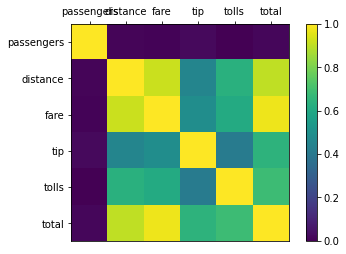

In [88]:
#correlation Matrix
df_corr = df[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']].corr()
plt.imshow(df_corr)

plt.xticks(np.arange(0, 6), df_corr.index)
plt.yticks(np.arange(0, 6), df_corr.index)

plt.gca().xaxis.tick_top()

plt.colorbar()
plt.show()

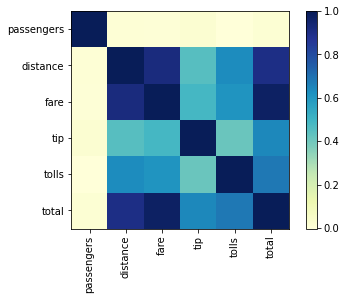

###### 💭 Scatter plot

The scatter plot shows the relationship between 2 (or 3 in 3D plots) variables by plotting them as points on Cartesian coordinates. We can observe `correlation` between variables sing it.

- Draw a scatter plot for distance and total, assume payment as a categorical variable then determine the samples by payment in scatter plot

- `Bonus`: Answer above cell with seaborn in just one line of code. (HINT: relplot)

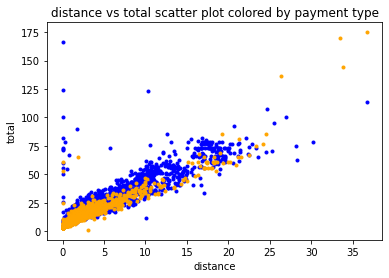

In [92]:
#scatter plot 
df_01 = df[df['payment'] == 'credit card']
df_02 = df[df['payment'] == 'cash']


plt.scatter(df_01.distance, df_01.total, marker='.', c='blue')
plt.scatter(df_02.distance, df_02.total, marker='.', c='orange')


plt.title('distance vs total scatter plot colored by payment type')
plt.ylabel('total')
plt.xlabel('distance')
plt.show()

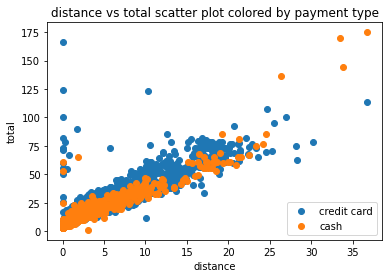

/home/d4red3vil81-l/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/d4red3vil81-l/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


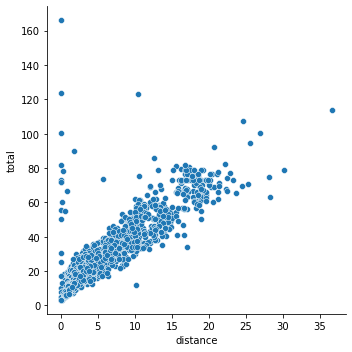

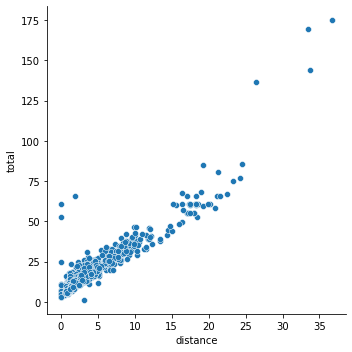

In [95]:
#bonus
sns.relplot(df_01.distance, df_01.total)
sns.relplot(df_02.distance, df_02.total)


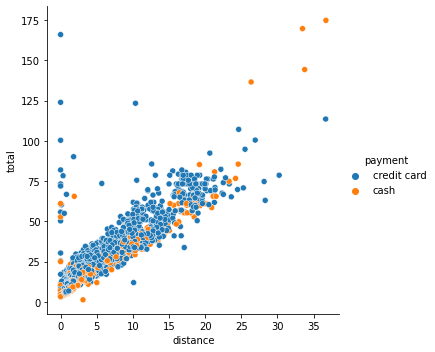

###### 💭 Subplot for Scatter Plots

Subplots can be used to plot multiple plots together. 
*   plot scatter plot  of distance vs total and total vs distance horizontally
*   plot above vertically



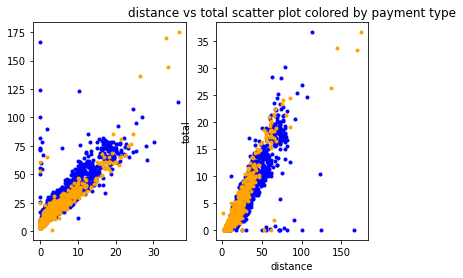

In [101]:
df_01 = df[df['payment'] == 'credit card']
df_02 = df[df['payment'] == 'cash']

# plot 1
plt.subplot(1, 2, 1)
plt.scatter(df_01.distance, df_01.total, marker='.', c='blue')
plt.scatter(df_02.distance, df_02.total, marker='.', c='orange')

# plot 2
plt.subplot(1, 2, 2)
plt.scatter(df_01.total, df_01.distance, marker='.', c='blue')
plt.scatter(df_02.total, df_02.distance, marker='.', c='orange')

plt.title('distance vs total scatter plot colored by payment type')
plt.ylabel('total')
plt.xlabel('distance')
plt.show()


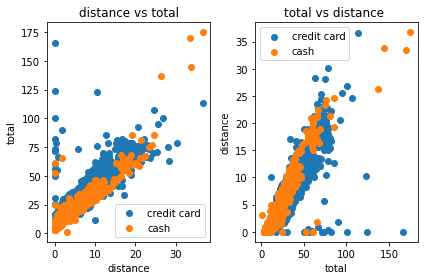

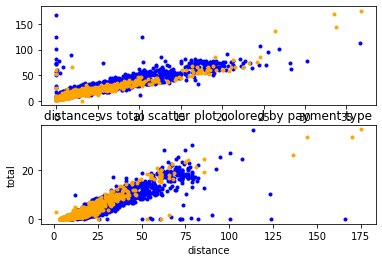

In [102]:
df_01 = df[df['payment'] == 'credit card']
df_02 = df[df['payment'] == 'cash']

# plot 1
plt.subplot(2, 1, 1)
plt.scatter(df_01.distance, df_01.total, marker='.', c='blue')
plt.scatter(df_02.distance, df_02.total, marker='.', c='orange')

# plot 2
plt.subplot(2, 1, 2)
plt.scatter(df_01.total, df_01.distance, marker='.', c='blue')
plt.scatter(df_02.total, df_02.distance, marker='.', c='orange')

plt.title('distance vs total scatter plot colored by payment type')
plt.ylabel('total')
plt.xlabel('distance')
plt.show()

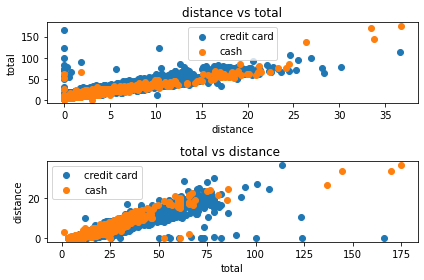

###### 💭 Scatter plot matrix

* Finally interpret the results: Find Patterns between variables (HINT: Use seaborn)

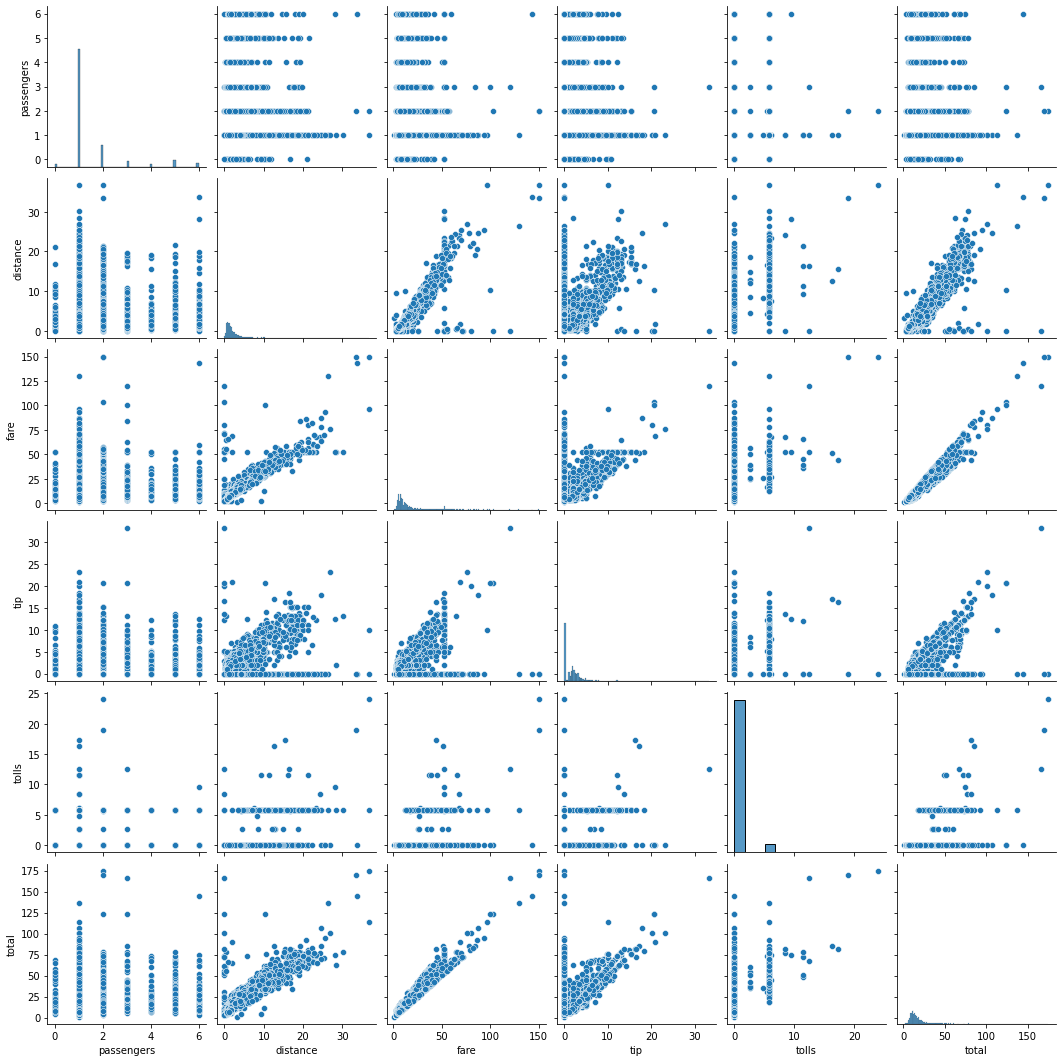

In [105]:
#scatter plot matrix

sns.pairplot(df[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])

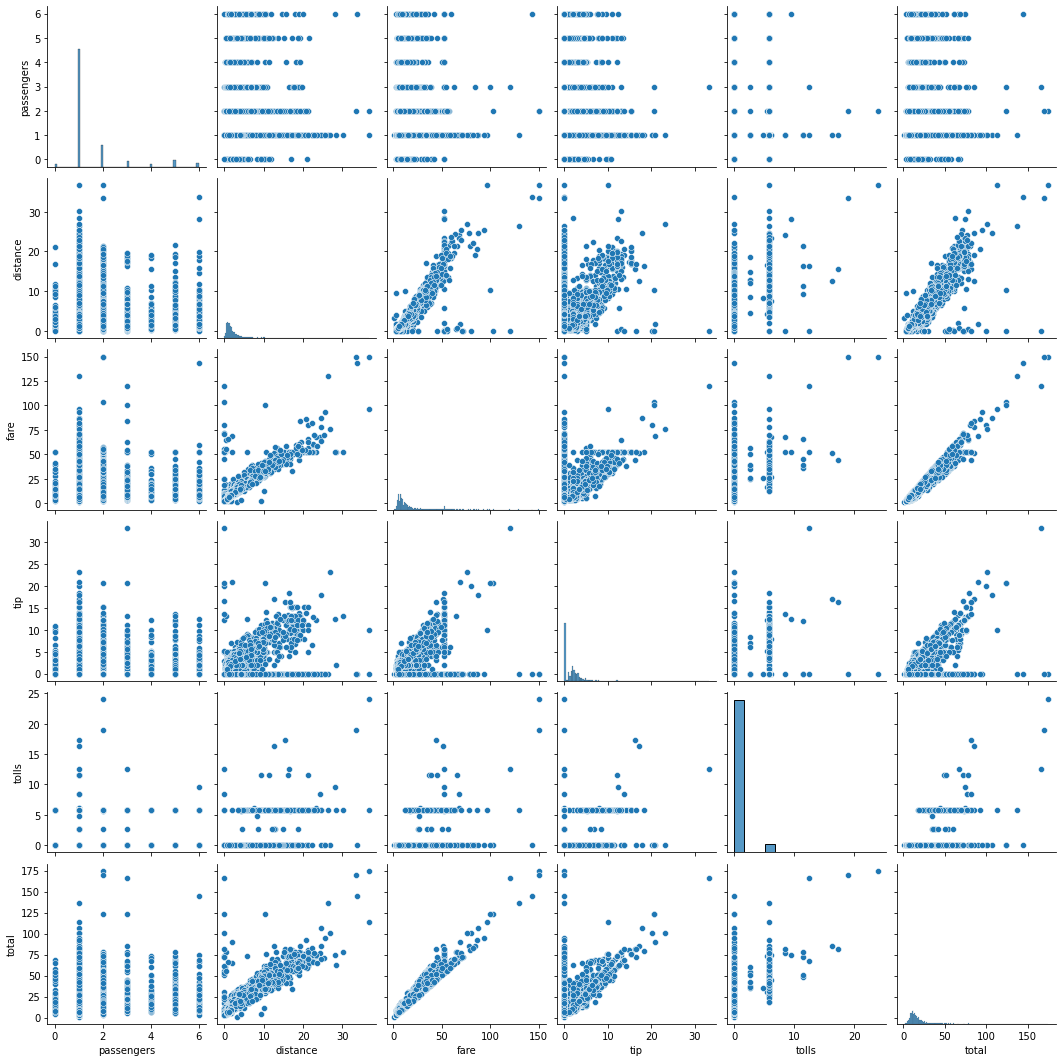

#### Quantitative vs. Categorical

##### 💭 Box Plot

Box plots contain of a box, whiskers and some points or outliers. The line inside the box is the median of the data and the box itself is from median of the lower half of the data (25th percentile or Q1) to median of the upper half of the data (75th percentile or Q3). Whiskers are lines from Q1−1.5⋅IQR to Q3+1.5⋅IQR and Q1−1.5⋅IQR to Q3+1.5⋅IQR, where IQR or the interquartile range is Q3−Q1. Points that fall out of the mentioned range are outliers and are shown as individual points.

* Let's compare median, quartiles and outliers of a numerical variable of two   different groups by two box plots:

> numerical variable: 'distance'

> first group: pickup_borough=='Manhattan'

> second group: pickup_borough == 'Queens'

> third group: pickup_borough == 'Bronx'



In [112]:
#box plot


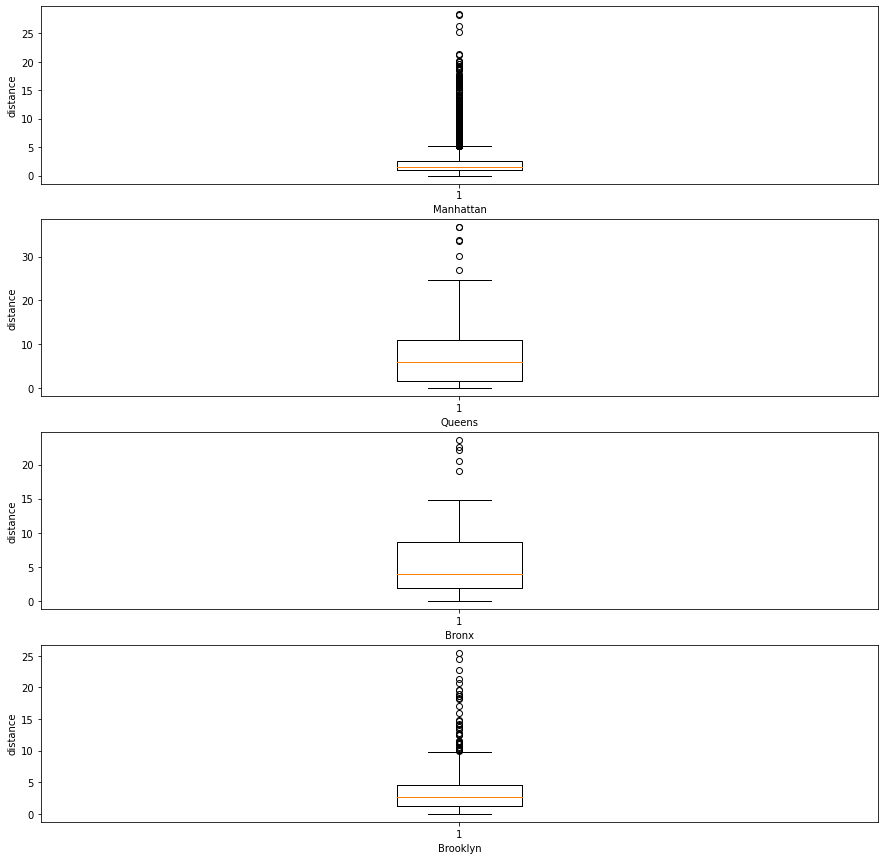

Bonus: try above with seaborn

In [ ]:
#box plot

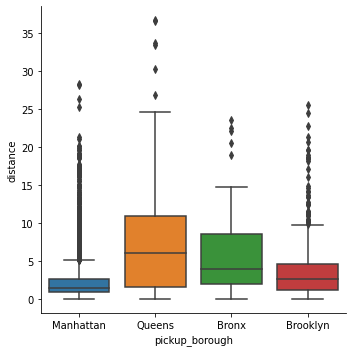

##### 💭Violin plot

Violin plot is similar to box plot but it plots the kernel density estimate of the data on both sides of the middle line.

Violin plot is similar to box plot but it plots the kernel density estimate of the data on both sides of the middle line.


- Plot violine plot for `distance` of different `pickup_borough` (HINT: Use seaborn)

In [ ]:
#violin plot

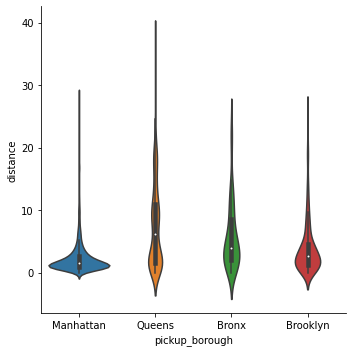

#### Categorical vs. Categorical

Points on a scatter plot can be colored or sized depending on a categorical value, as we saw before.

#####💭 Grouped BarChart

A bar chart is a great way to compare categorical data across one or two dimensions. More often than not, it’s more interesting to compare values across two dimensions and for that, a grouped bar chart is needed.
- plot a Grouped BarChart based on `payment` variable for `number of passengers`  
- Bonus: Answer above cell with seaborn in just one line of code. (HINT: catplot)

In [ ]:
#grouped bar chart

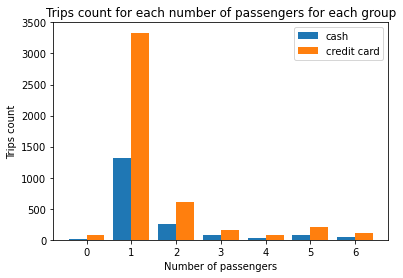

In [ ]:
#bonus

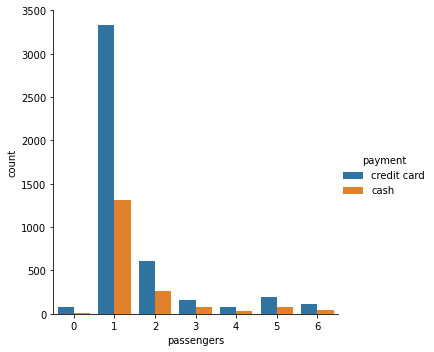